### Unidad II. Regresiones y reducción de dimensionalidad.

## Regresión Lineal Múltiple por el método de los Mínimos Cuadrados.

- Examen de los residuos. Prueba de normalidad de los residuales. 
- Prueba de homogeneidad de varianza. 
- Mínimos Cuadrados Ponderados. 
- Observaciones extremas. 
- Búsqueda de la mejor ecuación de regresión. Stepwise regression

### Regresión Lineal Múltiple

In [1]:
k = 2  # variables independientes
N = 10 # observaciones

10

In [2]:
X = rand(N, k) # simulación: valores observados para las variables independientes

10x2 Array{Float64,2}:
 0.629431  0.450741 
 0.361827  0.0340923
 0.648814  0.38683  
 0.850182  0.479027 
 0.195096  0.183894 
 0.556738  0.792507 
 0.369619  0.920438 
 0.759165  0.908434 
 0.939834  0.842273 
 0.069978  0.889898 

In [3]:
α = rand() # simulación: valor real de la intersección

0.3301683547620873

In [4]:
β = rand(k) # simulación: valores reales de los coeficientes

2-element Array{Float64,1}:
 0.30421 
 0.391893

In [5]:
E = 0.1 .* rand(N) # simulación: agrega errores al azar al modelo

10-element Array{Float64,1}:
 0.0183284 
 0.0968581 
 0.0823867 
 0.00971326
 0.0143502 
 0.0980046 
 0.0576521 
 0.0378605 
 0.0291259 
 0.028625  

In [6]:
Y = α + X * β + E # valores para la variable dependiente con el modelo lineal que acabamos de armar

10-element Array{Float64,1}:
 0.716618
 0.550458
 0.761527
 0.786242
 0.475935
 0.908116
 0.860975
 0.954983
 0.975282
 0.728826

La biblioteca [**MultivariateStats**](https://github.com/JuliaStats/MultivariateStats.jl) de Julia
implementa la regresión lineal por cuadrados mínimos en su función `llsq`. Este método toma la matriz de valores de la variable dependiente y el vector de la independiente. Retorna un vector de la forma $[\beta_{1}, …, \beta_{k}, \alpha]$.

In [7]:
using MultivariateStats

predicción = llsq(X, Y)

3-element Array{Float64,1}:
 0.293632
 0.380297
 0.389978

In [8]:
αₚ = predicción[end] # valor de la intersección del ajuste

0.38997782496661726

In [9]:
βₚ = predicción[1:end-1] # valores de los coeficientes del ajuste

2-element Array{Float64,1}:
 0.293632
 0.380297

In [10]:
Yₚ = αₚ + X*βₚ # valores predichos para la variable dependiente

10-element Array{Float64,1}:
 0.746215
 0.509187
 0.727601
 0.821791
 0.517199
 0.854842
 0.84855 
 0.958368
 0.986258
 0.748951

Diferencias entre los valores reales y los ajustados

In [11]:
α - αₚ

-0.05980947020452998

In [12]:
β - βₚ

2-element Array{Float64,1}:
 0.0105772
 0.0115958

In [13]:
Eₚ = Y - Yₚ # son los valores residuales de la regresión

10-element Array{Float64,1}:
 -0.0295968 
  0.0412711 
  0.0339255 
 -0.035549  
 -0.0412633 
  0.0532736 
  0.0124254 
 -0.00338515
 -0.010976  
 -0.0201253 


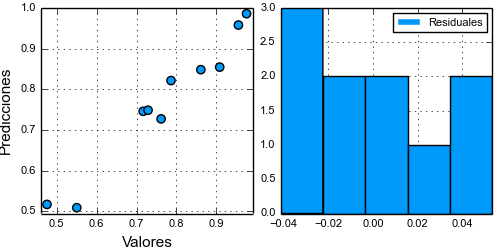

In [15]:
using Plots
pyplot(size=(500,250))

plot(
scatter(Y, Yₚ, legend=false, 
        xlab="Valores", ylab="Predicciones"),
histogram(Eₚ, label="Residuales", bins=5)
)

### Análisis de regresión

[**Supuestos**](http://www.itl.nist.gov/div898/handbook/pri/section2/pri24.htm), muchos de los cuales aplican a los residuos:  

- **Linealidad**: Si no se cumple se comete un error de <a href="https://en.wikipedia.org/wiki/Specification_(regression)">especificación</a>, dado que el modelo será incorrecto. En el caso de una o dos variables independientes, ayuda observar un gráfico de dispersión en busca de una tendencia lineal (línea, plano).   
- **Independencia de los residuos**: Los residuos no deben estar correlacionados (deben ser una variable aleatoria), algo que puede suceder cuando se trabaja con series temporales. El [estadístico de Durbin-Watson](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic) puede ayudar en la detección de autocorrelaciones.  
- **Homocedasticidad**: Igualdad de varianza para cada valor o grupo de valores de la/s variable/s independiente/s  
- **Normalidad**: Para cada valor o grupo de valores de la/s variable/s independiente/s los residuos se distribuyen de manera normal con $\mu = 0$   
- **No-colinealidad**: Las variables independientes no pueden ser combinaciones lineales unas de otras, no debe haber correlación entre ellas.   

In [16]:
using GLM

In [17]:
Xₐ = hcat(ones(N), X) # Y = 1*α + β₁X₁ + β₂X₂ + ...

10x3 Array{Float64,2}:
 1.0  0.629431  0.450741 
 1.0  0.361827  0.0340923
 1.0  0.648814  0.38683  
 1.0  0.850182  0.479027 
 1.0  0.195096  0.183894 
 1.0  0.556738  0.792507 
 1.0  0.369619  0.920438 
 1.0  0.759165  0.908434 
 1.0  0.939834  0.842273 
 1.0  0.069978  0.889898 

In [18]:
modelo = lm(Xₐ,Y)

GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}}:

Coefficients:
     Estimate Std.Error t value Pr(>|t|)
x1   0.389978  0.033078 11.7896    <1e-5
x2   0.293632 0.0456119 6.43762   0.0004
x3   0.380297 0.0397978 9.55572    <1e-4



In [19]:
residuos = residuals(modelo)

10-element Array{Float64,1}:
 -0.0295968 
  0.0412711 
  0.0339255 
 -0.035549  
 -0.0412633 
  0.0532736 
  0.0124254 
 -0.00338515
 -0.010976  
 -0.0201253 

### Mínimos Cuadrados Ponderados.

En el caso de no cumplirse con la homocedacia, es posible darle a cada observación un peso inversamente proporcional a la varianza para ese valor o grupo de valores de la/s variable/s independiente/s en una regresion por [minimos cuadrados ponderados](https://en.wikipedia.org/wiki/Least_squares#Weighted_least_squares). Lo óptimo es conocer de antemano cual es la varianza de cada medición. Por ejemplo si medimos cada dato con una herramienta diferente y conocemos su error. Sino existen maneras de determinar los posibles valores de la varianza (o de un estimador robusto correlacionado con ésta) con respecto a las variables independientes.  

In [20]:
using DataFrames

In [21]:
N = 100
X = rand(N)
β = rand()
α = 5

E = rand(Normal(1,0.5),N) .* X # heterocedasticidad

Y = α + X * β + E

datos = DataFrame(hcat(X, Y))
names!(datos, [:X, :Y])

,X,Y
1,0.56273022287607,5.94838411536056
2,0.7084749093766898,6.149688591485289
3,0.7011744226769079,5.605203404759204
4,0.2546850750270937,5.586800444075184
5,0.369879545639052,5.727483077320894
6,0.7301955650444896,6.716683037985142
7,0.5647358030282399,5.9124931575757085
8,0.15962795538283814,5.344786142554019
9,0.1997544958124131,5.308482041315156
10,0.9910014388035344,6.597542141028769


In [22]:
modelo = glm(Y ~ X, datos, Normal(), IdentityLink())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Normal{Float64},GLM.IdentityLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Float64}

Formula: Y ~ 1 + X

Coefficients:
             Estimate Std.Error z value Pr(>|z|)
(Intercept)   4.97604  0.054932 90.5854   <1e-99
X             1.92648 0.0938146  20.535   <1e-92


In [23]:
coeficientes = coef(modelo)

2-element Array{Float64,1}:
 4.97604
 1.92648


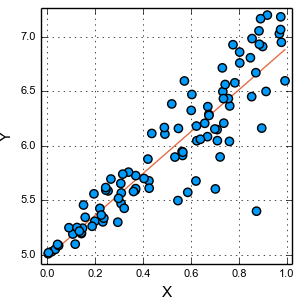

In [24]:
pyplot(size=(300,300))

scatter(datos, :X, :Y, legend=false)
Plots.abline!(coeficientes[2], coeficientes[1])

In [25]:
residuos = Y - predict(modelo)

100-element Array{Float64,1}:
 -0.111747  
 -0.191218  
 -0.721639  
  0.120113  
  0.0388754 
  0.333932  
 -0.151502  
  0.0612248 
 -0.0523825 
 -0.287647  
  0.379581  
  0.0944785 
  0.0930405 
  ⋮         
 -0.531593  
  0.00412744
 -1.25583   
 -0.0321105 
  0.408466  
 -0.294383  
  0.158512  
  0.0339676 
 -0.24517   
 -0.0188709 
 -0.184453  
  0.187584  


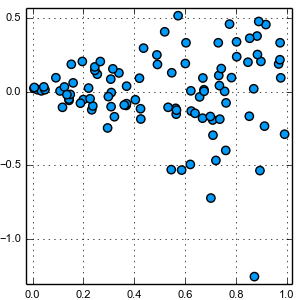

In [26]:
scatter(X, residuos, legend=false)

In [35]:
residuos_modelo = DataFrame(
x = collect(0:0.05:0.8),
y = Float64[ mad( residuos[i .<= X .<= i+0.2] ) for i in collect(0:0.05:0.8) ]
)

,x,y
1,0.0,0.04956334024050179
2,0.05,0.08829564240747546
3,0.1,0.10122137941044472
4,0.15,0.17888825066914482
5,0.2,0.13774192254380221
6,0.25,0.17616406571499774
7,0.3,0.14480951828912725
8,0.35,0.19382763519956683
9,0.4,0.28289546827815787
10,0.45,0.4320908335209055


In [33]:
modelo = glm(y ~ x, residuos_modelo, Normal(), IdentityLink())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Normal{Float64},GLM.IdentityLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Float64}

Formula: y ~ 1 + x

Coefficients:
              Estimate Std.Error z value Pr(>|z|)
(Intercept)  0.0961484  0.033633 2.85876   0.0043
x             0.286627 0.0717057 3.99726    <1e-4



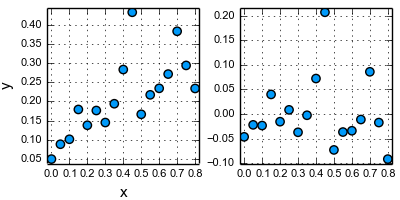

In [38]:
plot(
scatter(residuos_modelo, :x,:y),
scatter(residuos_modelo[:x],residuos_modelo[:y]-predict(modelo)),
legend=false, size=(400,200))

In [39]:
C = coef(modelo)

2-element Array{Float64,1}:
 0.0961484
 0.286627 

In [40]:
pesos = Float64[ 1/(C[1] + C[2]*x) for x in datos[:X] ]

100-element Array{Float64,1}:
 3.88437
 3.34206
 3.3656 
 5.91198
 4.94644
 3.27394
 3.87572
 7.04711
 6.51876
 2.63022
 2.86393
 3.47106
 4.61552
 ⋮      
 3.78525
 3.45427
 2.88862
 5.50612
 4.07981
 3.33891
 3.23817
 9.18191
 5.53238
 7.41313
 4.58346
 7.14962

In [41]:
glm(Y ~ X, datos, Normal(), IdentityLink(), wts=pesos)

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Normal{Float64},GLM.IdentityLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Float64}

Formula: Y ~ 1 + X

Coefficients:
             Estimate Std.Error z value Pr(>|z|)
(Intercept)   4.98857 0.0179254 278.297   <1e-99
X             1.90201 0.0363663 52.3014   <1e-99


### Ridge Regression 

[Ridge regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) en [MultivariateStats](http://multivariatestatsjl.readthedocs.io/en/latest/lreg.html#ridge-regression) y [en ScikitLearn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression).  
Esta regresión es mucho más robusta a la presencia de variables explicativas correlacionadas (colineales).

*Ridge Regression* usando **ScikitLearn.jl**, el valor de α es seleccionado usando *validación cruzada*:

In [42]:
k = 3  # variables independientes
@assert k > 2
N = 10 # observaciones
X = rand(N, k) # simulación: valores observados para las variables independientes
X[:,1] = X[:,1].*X[:,2] + X[:,1] # colineales
α = rand() # simulación: valor real de la intersección
β = rand(k) # simulación: valores reales de los coeficientes
E = 0.1 .* rand(N) # simulación: agrega errores al azar al modelo
Y = α + X * β + E # valores para la variable dependiente con el modelo lineal que acabamos de armar

10-element Array{Float64,1}:
 0.789255
 1.60645 
 1.42648 
 1.11923 
 0.915625
 1.12924 
 0.826748
 1.39492 
 1.05511 
 1.10098 

In [43]:
using ScikitLearn
@sk_import linear_model: RidgeCV

In [44]:
rcv = RidgeCV(alphas=0.01:0.01:10.0)

PyObject RidgeCV(alphas=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0....9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9, 9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99, 10.0],
    cv=None, fit_intercept=True, gcv_mode=None, loss_func=None,
    normalize=False, score_func=None, scoring=None, store_cv_values=False)

In [45]:
ScikitLearn.fit!(rcv, X, Y)

PyObject RidgeCV(alphas=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0....9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9, 9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99, 10.0],
    cv=None, fit_intercept=True, gcv_mode=None, loss_func=None,
    normalize=False, score_func=None, scoring=None, store_cv_values=False)

In [46]:
rcv[:coef_]

3-element Array{Float64,1}:
 0.462786
 0.779849
 0.310134

In [47]:
rcv[:intercept_]

0.3141417397957643

In [48]:
α = rcv[:alpha_]

0.01

*Ridge Regression* usando **ScikitLearn.jl**:

In [49]:
@sk_import linear_model: Ridge

In [50]:
r = Ridge(alpha = α)

PyObject Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)

In [51]:
ScikitLearn.fit!(r, X, Y)

PyObject Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, solver='auto', tol=0.001)

In [52]:
r[:coef_]

3-element Array{Float64,1}:
 0.462786
 0.779849
 0.310134

In [53]:
rcv[:intercept_]

0.3141417397957643

*Ridge Regression* usando **MultivariateStats**:

In [54]:
MultivariateStats.ridge(X, Y, α)

4-element Array{Float64,1}:
 0.462786
 0.779849
 0.310134
 0.314142

*Ridge Regression* usando **R** and **RCall**:

In [55]:
using RCall

a = α

R"""
library(MASS)
lmr <- lm.ridge($Y ~ $X, lambda=$a)
"""

RCall.RObject{RCall.VecSxp}
           `#JL`$X1  `#JL`$X2  `#JL`$X3 
0.2782288 0.4752646 0.8084697 0.3462845 
